# Health Insurance Lead Prediction



### Exploaration Data analysis and inference

In [13]:
# Import essential Viz and data lib
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [14]:
# Read the Data
df=pd.read_csv("../job_a_thon/dataset/train_Df64byy.csv")

In [15]:
# Views first 5 Rows
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [18]:
print('-----------Training Data Shape-------------')
print(f'No. of Rows: {df.shape[0]}')
print(f'No. of Columns: {df.shape[1]}')

-----------Training Data Shape-------------
No. of Rows: 50882
No. of Columns: 14


In [21]:
null_count=df.isnull().sum()
null_count=null_count[null_count!=0]
print('---------Total Null values per columns-------------\n')
print(null_count)

---------Total Null values per columns-------------

Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
dtype: int64


In [22]:
CAT_FEATUES=[]
NUM_FEATUES=[]

for i in df.columns:
    if df[i].dtype=='object':
        CAT_FEATUES.append(i)
    else:
        NUM_FEATUES.append(i)
        
ALL_FEATUES=CAT_FEATUES+NUM_FEATUES

#Convert All features into NUM into float64
for i in NUM_FEATUES:
    df[i].astype('float64')
ALL_FEATUES.remove('Response')
NUM_FEATUES.remove('Response')
TARGET='Response'
print('\n\t--------All Features----------')
print(ALL_FEATUES)
print('\n\t--------CAT Features----------')
print(CAT_FEATUES)
print('\n\t--------NUM Features----------')
print(NUM_FEATUES)
print('\n\t--------TARGET Value----------')
print(TARGET)


	--------All Features----------
['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'ID', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium']

	--------CAT Features----------
['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']

	--------NUM Features----------
['ID', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium']

	--------TARGET Value----------
Response


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

<AxesSubplot:>

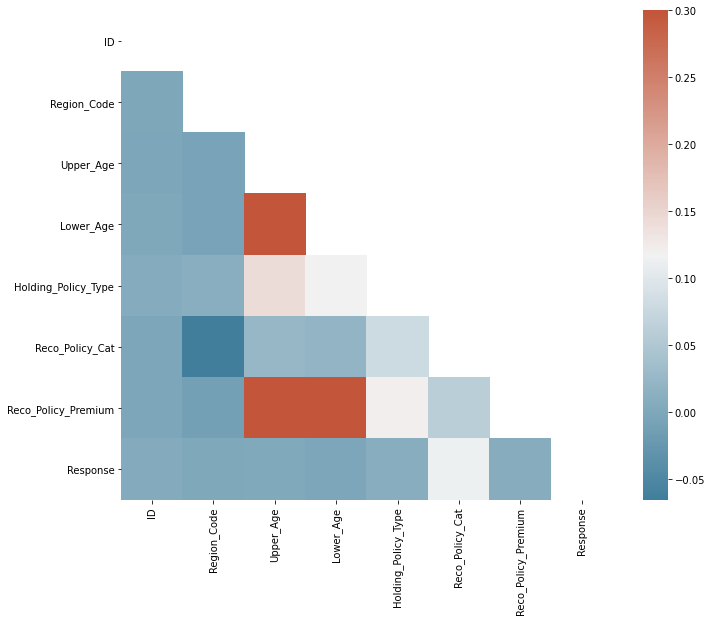

In [24]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3)

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

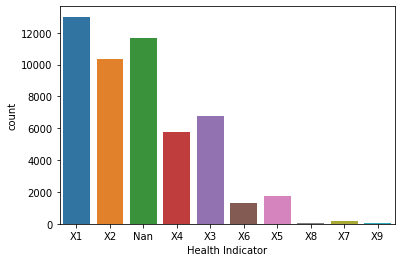

In [26]:
dff=df['Health Indicator'].fillna("Nan")
sns.countplot(x=dff)
# Health Indicatior Representation

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

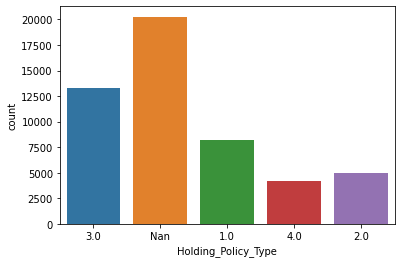

In [27]:
dff=df['Holding_Policy_Type'].fillna("Nan")
sns.countplot(x=dff)

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

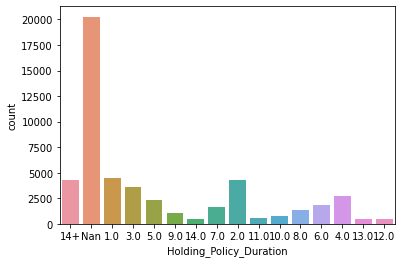

In [28]:
dff=df['Holding_Policy_Duration'].fillna("Nan")
sns.countplot(x=dff)

<AxesSubplot:xlabel='City_Code', ylabel='count'>

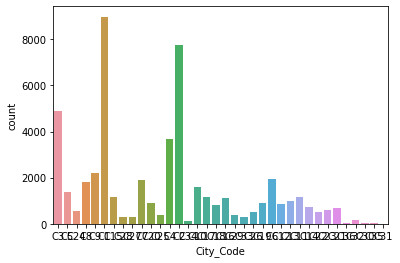

In [24]:
sns.countplot(x=df['City_Code'])

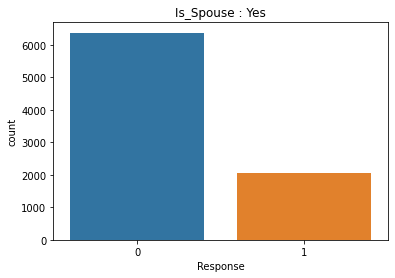

In [36]:
dff=df.loc[df['Is_Spouse']=='Yes']#No
dff.reset_index()
plt.title("Is_Spouse : Yes")
sns.countplot(x=dff.Response);

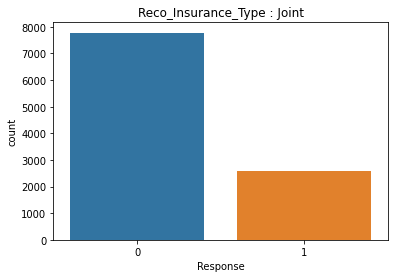

In [39]:
dff=df.loc[df['Reco_Insurance_Type']=='Joint']#Individual
dff.reset_index()
plt.title("Reco_Insurance_Type : Joint")
sns.countplot(x=dff.Response);

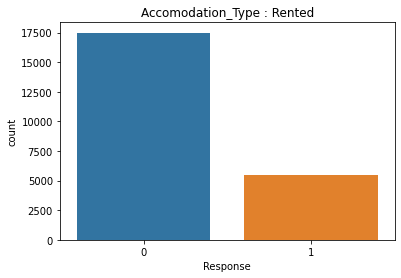

In [44]:
dff=df.loc[df['Accomodation_Type']=='Rented'] #Owned
dff.reset_index()
plt.title("Accomodation_Type : Rented")
sns.countplot(x=dff.Response);

<AxesSubplot:ylabel='Frequency'>

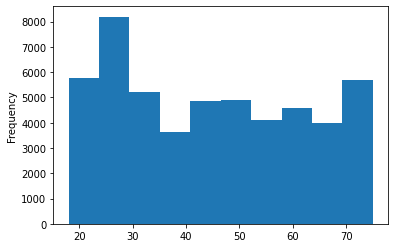

In [19]:
# Upper_Age Distribution
df.Upper_Age.plot(kind='hist');

<AxesSubplot:ylabel='Frequency'>

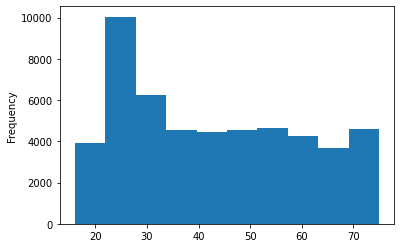

In [18]:
# Lower_Age Distribution
df.Lower_Age.plot(kind='hist');

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

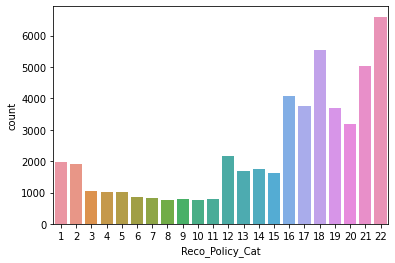

In [15]:
sns.countplot(x=df['Reco_Policy_Cat']);

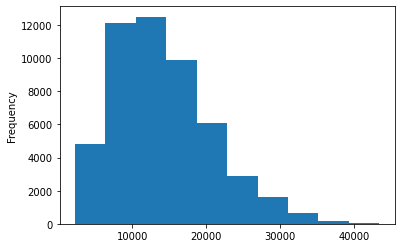

In [50]:
#Reco_Policy_Premium 
df.Reco_Policy_Premium.plot(kind='hist');

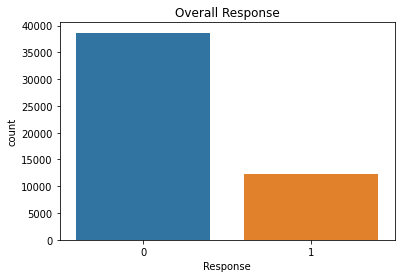

In [47]:
# Overall Response
plt.title("Overall Response")
sns.countplot(x=df['Response']);

In [29]:
test=pd.read_csv("/home/leo/machineLearning/job_a_thon/dataset/test_YCcRUnU.csv")


print('-----------Training Data Shape-------------')
print(f'No. of Rows: {test.shape[0]}')
print(f'No. of Columns: {test.shape[1]}')

-----------Training Data Shape-------------
No. of Rows: 21805
No. of Columns: 13


In [30]:
null_count=test.isnull().sum()
null_count=null_count[null_count!=0]
print('---------Total Null values per columns-------------\n')
print(null_count)

---------Total Null values per columns-------------

Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
dtype: int64


### Continue =>  [Model](http://127.0.0.1:8888/notebooks/Model.ipynb)